In [104]:
#importing the necessray libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adadelta, Adam
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [105]:
# Loading the dataset
df = pd.read_csv('/content/Crystal_structure.csv')

In [106]:
# Making a correlation matrix for removing out unnecessary columns
corr_matrix=df.corr()
print(corr_matrix)

               In literature  r(AXII)(Å)     r(AVI)(Å)  r(BVI)(Å)  \
In literature       1.000000    0.183138  1.571233e-01  -0.132859   
r(AXII)(Å)          0.183138    1.000000  9.374915e-01  -0.005210   
r(AVI)(Å)           0.157123    0.937492  1.000000e+00   0.002976   
r(BVI)(Å)          -0.132859   -0.005210  2.976284e-03   1.000000   
EN(A)              -0.186487   -0.627417 -6.276035e-01  -0.004038   
EN(B)               0.047653    0.009343  1.280092e-07  -0.627911   
l(A-O)(Å)           0.112333    0.327965  2.579035e-01  -0.006976   
l(B-O)(Å)          -0.018337   -0.001212 -3.064064e-07   0.280566   
ΔENR                0.014930   -0.455477 -4.413984e-01  -0.847304   
tG                  0.231562    0.798824  7.454083e-01  -0.591207   
μ                  -0.132841   -0.005205  2.979491e-03   1.000000   

                      EN(A)         EN(B)     l(A-O)(Å)     l(B-O)(Å)  \
In literature -1.864866e-01  4.765290e-02  1.123334e-01 -1.833665e-02   
r(AXII)(Å)    -6.274166e-

<ipython-input-106-fc7184e3a413>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


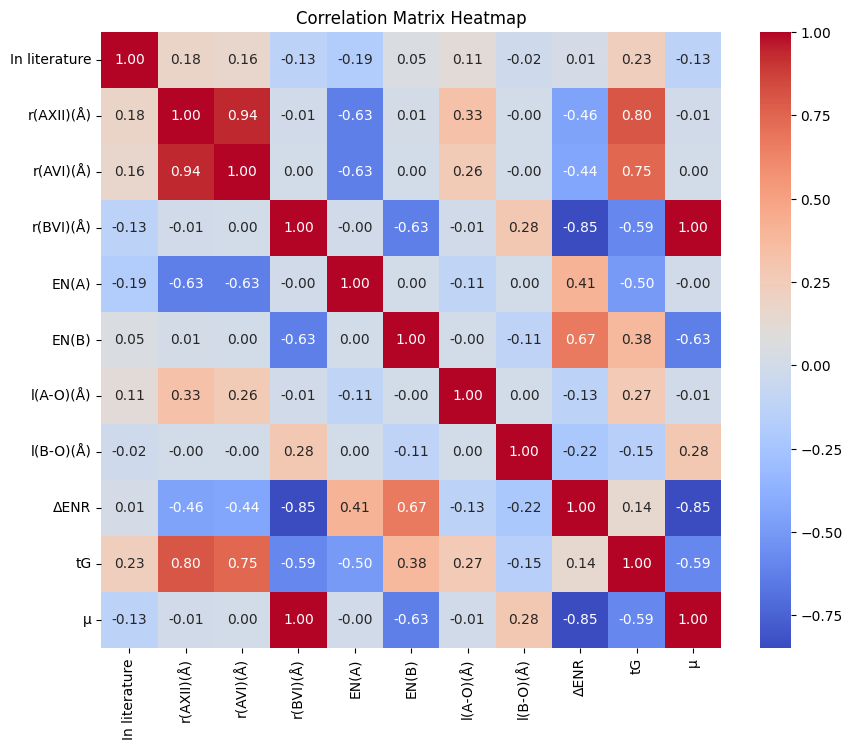

In [107]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [108]:
# Setting the threshold for correlation
threshold = 0.3

# Setting diagonal elements of correlation matrix to 0, for comparison from rest, because correlation from self is 1
np.fill_diagonal(corr_matrix.values, 0)

corr_matrix

,In literature,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ
In literature,0.000000,0.183138,1.571233e-01,-0.132859,-1.864866e-01,4.765290e-02,1.123334e-01,-1.833665e-02,0.014930,0.231562,-0.132841
r(AXII)(Å),0.183138,0.000000,9.374915e-01,-0.005210,-6.274166e-01,9.343451e-03,3.279648e-01,-1.212017e-03,-0.455477,0.798824,-0.005205
r(AVI)(Å),0.157123,0.937492,0.000000e+00,0.002976,-6.276035e-01,1.280092e-07,2.579035e-01,-3.064064e-07,-0.441398,0.745408,0.002979
r(BVI)(Å),-0.132859,-0.005210,2.976284e-03,0.000000,-4.037933e-03,-6.279114e-01,-6.975818e-03,2.805661e-01,-0.847304,-0.591207,1.000000
EN(A),-0.186487,-0.627417,-6.276035e-01,-0.004038,0.000000e+00,7.377587e-17,-1.106014e-01,3.319693e-16,0.410564,-0.497564,-0.004042
EN(B),0.047653,0.009343,1.280092e-07,-0.627911,7.377587e-17,0.000000e+00,-3.285892e-16,-1.140845e-01,0.671796,0.377332,-0.627914
l(A-O)(Å),0.112333,0.327965,2.579035e-01,-0.006976,-1.106014e-01,-3.285892e-16,0.000000e+00,1.139524e-17,-0.126965,0.266484,-0.006974
l(B-O)(Å),-0.018337,-0.001212,-3.064064e-07,0.280566,3.319693e-16,-1.140845e-01,1.139524e-17,0.000000e+00,-0.223020,-0.154808,0.280566
ΔENR,0.014930,-0.455477,-4.413984e-01,-0.847304,4.105635e-01,6.717962e-01,-1.269648e-01,-2.230204e-01,0.000000,0.142509,-0.847307
tG,0.231562,0.798824,7.454083e-01,-0.591207,-4.975641e-01,3.773318e-01,2.664836e-01,-1.548084e-01,0.142509,0.000000,-0.591202


In [109]:
# Finding out columns with correlation below the threshold
low_corr_columns = corr_matrix.columns[(abs(corr_matrix) < threshold).all()]

# Removing the low correlation columns
df_new = df.drop(low_corr_columns, axis=1)
print("Removed columns:", low_corr_columns.tolist())

print(df_new)

Removed columns: ['In literature', 'l(B-O)(Å)']
     Compound   A   B v(A) v(B)  r(AXII)(Å)  r(AVI)(Å)  r(BVI)(Å)  EN(A)  \
0       Ac2O3  Ac  Ac    0    0        1.12       1.12       1.12   1.10   
1      AcAgO3  Ac  Ag    0    0        1.12       1.12       0.95   1.10   
2      AcAlO3  Ac  Al    0    0        1.12       1.12       0.54   1.10   
3      AcAsO3  Ac  As    0    0        1.12       1.12       0.52   1.10   
4      AcAuO3  Ac  Au    0    0        1.12       1.12       0.93   1.10   
...       ...  ..  ..  ...  ...         ...        ...        ...    ...   
5324    ZrWO3  Zr   W    1    5        0.89       0.72       0.62   1.33   
5325    ZrYO3  Zr   Y    -    -        0.89       0.72       0.90   1.33   
5326   ZrYbO3  Zr  Yb    -    -        0.89       0.72       0.95   1.33   
5327   ZrZnO3  Zr  Zn    -    -        0.89       0.72       0.74   1.33   
5328    Zr2O3  Zr  Zr    -    -        0.89       0.72       0.72   1.33   

      EN(B)  l(A-O)(Å)      ΔENR       

In [110]:
df_new.head()

,Compound,A,B,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,0,0,1.12,1.12,1.12,1.1,1.10,0.0,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,0,0,1.12,1.12,0.95,1.1,1.93,0.0,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,0,0,1.12,1.12,0.54,1.1,1.61,0.0,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,0,0,1.12,1.12,0.52,1.1,2.18,0.0,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,0,0,1.12,1.12,0.93,1.1,2.54,0.0,-2.279786,0.764768,-,0.664286,orthorhombic


In [111]:
# Now for dealing with missing values
# Iterating through each column
columns_with_any_dash = []
for column in df.columns:
    if '-' in df[column].values:
        columns_with_any_dash.append(column)

print("Columns with at least one '-':")
for col in columns_with_any_dash:
    print(col)

Columns with at least one '-':
v(A)
v(B)
τ
Lowest distortion


<ipython-input-111-ab4b03501921>:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if '-' in df[column].values:


In [112]:
# Replacing the - with NaN to do one hot encoding
df_new.replace('-',np.nan,inplace=True)
df_new.head()
df_new['Lowest distortion'].unique()

array(['cubic', 'orthorhombic', 'rhombohedral', 'tetragonal', nan],
      dtype=object)

In [113]:
#using the KNN to impute the missing values
imputer = KNNImputer(n_neighbors=3)

columns_to_impute='v(A)','v(B)','τ'

for column in columns_to_impute:
    df_new[column] = imputer.fit_transform(df_new[[column]])

df_new.head()

,Compound,A,B,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,0.0,0.0,1.12,1.12,1.12,1.1,1.10,0.0,-3.248000,0.707107,2.503861,0.800000,cubic
1,AcAgO3,Ac,Ag,0.0,0.0,1.12,1.12,0.95,1.1,1.93,0.0,-2.565071,0.758259,2.503861,0.678571,orthorhombic
2,AcAlO3,Ac,Al,0.0,0.0,1.12,1.12,0.54,1.1,1.61,0.0,-1.846714,0.918510,2.503861,0.385714,cubic
3,AcAsO3,Ac,As,0.0,0.0,1.12,1.12,0.52,1.1,2.18,0.0,-1.577429,0.928078,2.503861,0.371429,orthorhombic
4,AcAuO3,Ac,Au,0.0,0.0,1.12,1.12,0.93,1.1,2.54,0.0,-2.279786,0.764768,2.503861,0.664286,orthorhombic


In [114]:
# Using the one hot encoding
columns_to_encode=['Compound','A','B','Lowest distortion']
for column in columns_to_encode:
    data_reshaped = df_new[column].values.reshape(-1, 1)
    encoder = OneHotEncoder()
    one_hot_encoded = encoder.fit_transform(data_reshaped)
    one_hot_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out([column]))
    df_new = pd.concat([df_new, one_hot_df], axis=1)
    df_new.drop(columns=[column], inplace=True)

In [115]:
df_new.head()

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),ΔENR,tG,...,B_W,B_Y,B_Yb,B_Zn,B_Zr,Lowest distortion_cubic,Lowest distortion_orthorhombic,Lowest distortion_rhombohedral,Lowest distortion_tetragonal,Lowest distortion_nan
0,0.0,0.0,1.12,1.12,1.12,1.1,1.10,0.0,-3.248000,0.707107,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.12,1.12,0.95,1.1,1.93,0.0,-2.565071,0.758259,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.12,1.12,0.54,1.1,1.61,0.0,-1.846714,0.918510,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.12,1.12,0.52,1.1,2.18,0.0,-1.577429,0.928078,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.12,1.12,0.93,1.1,2.54,0.0,-2.279786,0.764768,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [116]:
# Perform KNN imputation for the four columns
imputer_knn = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer_knn.fit_transform(df_new.drop(columns=['Lowest distortion_nan'])), columns=df_new.drop(columns=['Lowest distortion_nan']).columns)

# Get the values from the 'Lowest distortion_nan' column
nan_values = df_new['Lowest distortion_nan']

# Filling the missing values in the other four columns based on the 'nan_values'
for col in ['cubic', 'orthorhombic', 'tetragonal', 'rhombohedral']:
    df_imputed['Lowest distortion_' + col] = df_imputed['Lowest distortion_' + col].where(nan_values != 1, 1)

df_imputed.head()

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),ΔENR,tG,...,B_V,B_W,B_Y,B_Yb,B_Zn,B_Zr,Lowest distortion_cubic,Lowest distortion_orthorhombic,Lowest distortion_rhombohedral,Lowest distortion_tetragonal
0,0.0,0.0,1.12,1.12,1.12,1.1,1.10,0.0,-3.248000,0.707107,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.12,1.12,0.95,1.1,1.93,0.0,-2.565071,0.758259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.12,1.12,0.54,1.1,1.61,0.0,-1.846714,0.918510,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.12,1.12,0.52,1.1,2.18,0.0,-1.577429,0.928078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.12,1.12,0.93,1.1,2.54,0.0,-2.279786,0.764768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [117]:
# Splitting the dataset into features (X) and target variable (y)
X = df_imputed.drop(columns=['Lowest distortion_cubic', 'Lowest distortion_orthorhombic', 'Lowest distortion_tetragonal', 'Lowest distortion_rhombohedral'])
y = df_imputed[['Lowest distortion_cubic', 'Lowest distortion_orthorhombic', 'Lowest distortion_tetragonal', 'Lowest distortion_rhombohedral']]

In [118]:
# Splitting the dataset into training, validation, and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [119]:
# Building a deep neural network
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [120]:
# Training the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=34, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/34
82/82 [==============================] - 3s 17ms/step - loss: 1.0545 - accuracy: 0.5925 - val_loss: 0.9050 - val_accuracy: 0.6506
Epoch 2/34
82/82 [==============================] - 1s 12ms/step - loss: 0.9747 - accuracy: 0.6342 - val_loss: 0.8453 - val_accuracy: 0.6533
Epoch 3/34
82/82 [==============================] - 1s 11ms/step - loss: 0.8975 - accuracy: 0.6821 - val_loss: 0.8273 - val_accuracy: 0.6756
Epoch 4/34
82/82 [==============================] - 1s 11ms/step - loss: 0.8385 - accuracy: 0.7143 - val_loss: 0.7974 - val_accuracy: 0.7015
Epoch 5/34
82/82 [==============================] - 1s 11ms/step - loss: 0.7468 - accuracy: 0.7511 - val_loss: 0.7777 - val_accuracy: 0.6979
Epoch 6/34
82/82 [==============================] - 1s 10ms/step - loss: 0.6915 - accuracy: 0.7798 - val_loss: 0.7665 - val_accuracy: 0.7051
Epoch 7/34
82/82 [==============================] - 1s 10ms/step - loss: 0.5998 - accuracy: 0.8254 - val_loss: 0.8107 - val_accuracy: 0.6971
Epoch 8/34
82

50/50 [==============================] - 0s 3ms/step - loss: 1.1465 - accuracy: 0.6592
Optimizer: SGD, Test accuracy: 0.6591619849205017


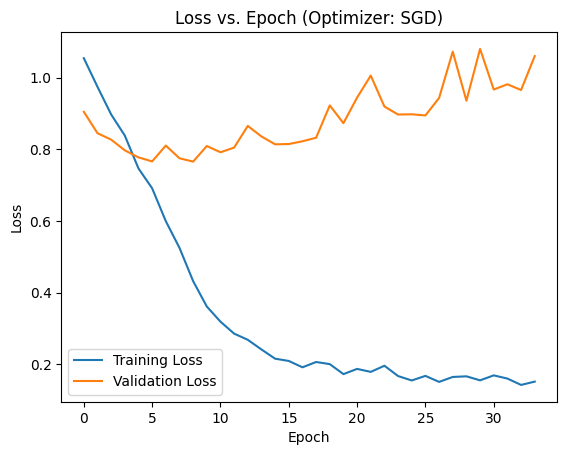

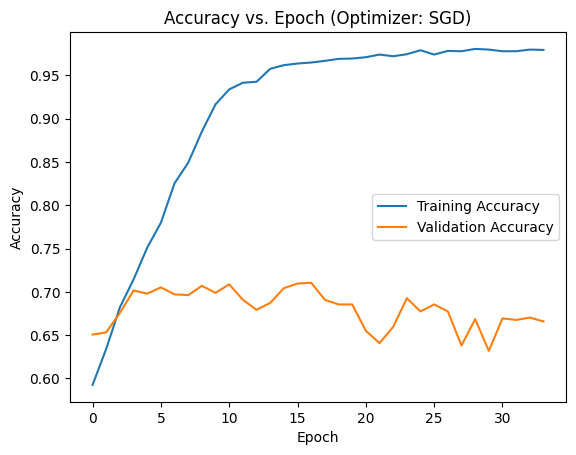

50/50 [==============================] - 0s 3ms/step - loss: 1.1465 - accuracy: 0.6592
Optimizer: RMSprop, Test accuracy: 0.6591619849205017


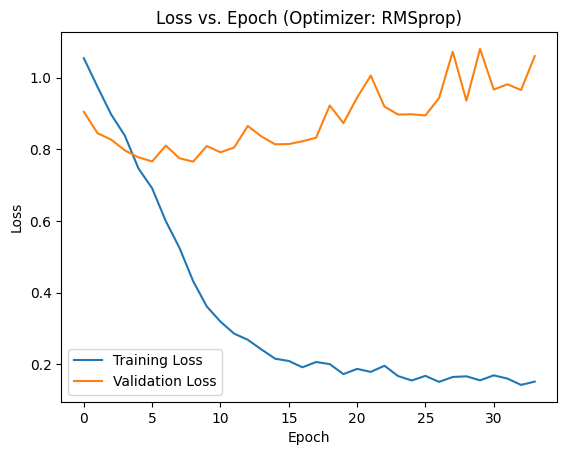

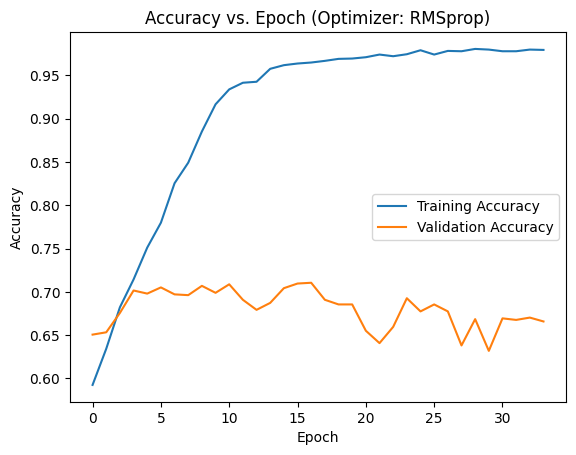

50/50 [==============================] - 0s 3ms/step - loss: 1.1465 - accuracy: 0.6592
Optimizer: Adadelta, Test accuracy: 0.6591619849205017


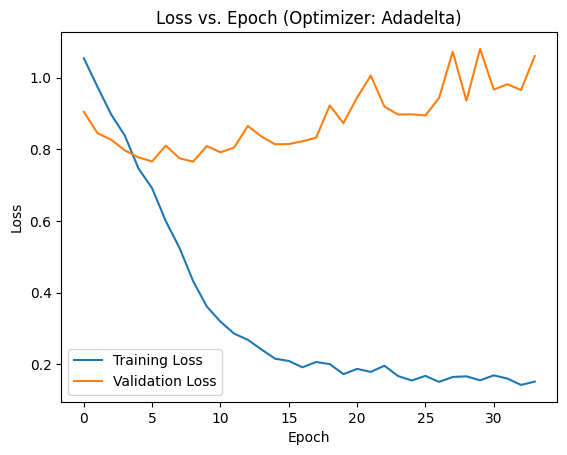

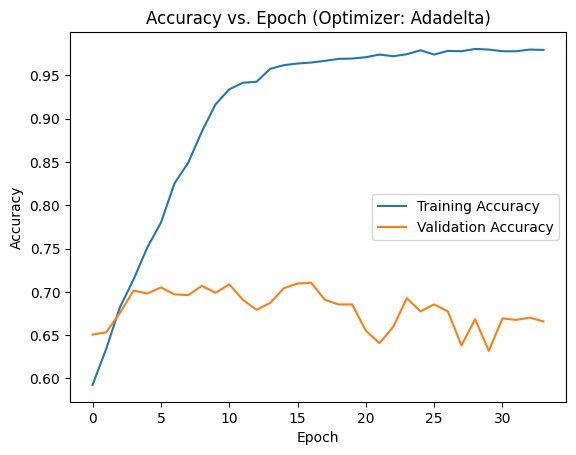

50/50 [==============================] - 0s 3ms/step - loss: 1.1465 - accuracy: 0.6592
Optimizer: Adam, Test accuracy: 0.6591619849205017


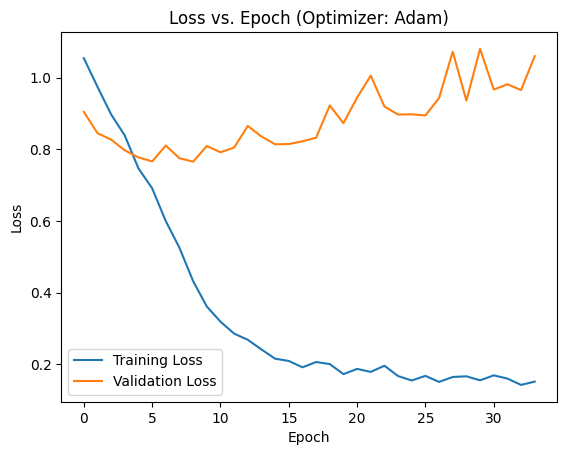

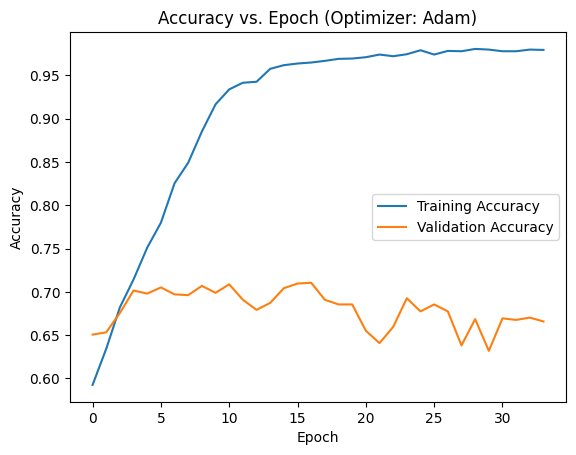

In [121]:
# Evaluating the model on test data with different optimizers
optimizers = ['SGD', 'RMSprop', 'Adadelta', 'Adam']

for optimizer in optimizers:#Using for loop for each of the optimizers
    if optimizer == 'SGD':
        opt = SGD()
    elif optimizer == 'RMSprop':
        opt = RMSprop()
    elif optimizer == 'Adadelta':
        opt = Adadelta()
    elif optimizer == 'Adam':
        opt = Adam()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f'Optimizer: {optimizer}, Test accuracy: {test_acc}')

    # Plotting loss vs. epoch
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss vs. Epoch (Optimizer: {optimizer})')
    plt.show()

    #Plotting accuracy vs. epoch
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Accuracy vs. Epoch (Optimizer: {optimizer})')
    plt.show()